# Integral som areal

__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

<hr/>

<img alt="Opphavsmann: 4C Lisens: Creative Commons Attribution-Share Alike 3.0 Unported" style="float: right; margin-left: 10px;" src="img/integral.png">

**Matematisk svarer beregning av flateinnholdet $S$ til integrasjon. Det arealet som begrenses ved x-aksen, to ordinater x = a og x = b og kurven y = f(x), er gitt ved det bestemte integral Kilde: [SNL](https://snl.no/areal)**

Dette kan skrives som $$S = \int_{a}^{b} f(x) dx$$

## Numerisk beregning av arealet under en funksjon

Arealet under en funksjon kan ha mange betydninger. I fysikk er arelet under en fartsgraf v(t) det samme som tilbakelagt strekning. Totallønn, strømforbruk m.m. er andre eksmepler.

For å finne arealet under en funksjon uten å måtte integrere kan vi bruke en teknikk som kalles Riemannsum. Den baserer seg på at vi lager mange rektangler med en fast bredde. Høyden på hvert enkelt rektangel tilsvarer funksjonsverdien. Hvis vi summerer arealet av alle rektanglene får vi en ganske god tilnærming av totalarealet under funksjonen. Hvis vi gjør bredden på hvert enkelt rektangel mindre får vi en bedre tilnærimg.

<img alt="Opphavsmann: Mestigoit Lisens: Creative Commons Attribution-Share Alike 3.0 Unported" style="width: 200px; margin-left: 30px;" src="img/Riemannsum_left.gif">

By <a href="//commons.wikimedia.org/wiki/User:09glasgow09" title="User:09glasgow09">09glasgow09</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=7697902">Link</a>

<img alt="Opphavsmann: Mestigoit Lisens: Creative Commons Attribution-Share Alike 3.0 Unported" style="width: 200px; margin-left: 30px;" src="img/Riemansum_1.gif">

I figurene ser vi at de grønne rektanglene har ulik bredde. Mindre bredde gir flere rektangler og bedre tilnæring.

<img alt="Opphavsmann: Mestigoit Lisens: Creative Commons Attribution-Share Alike 3.0 Unported" style="width: 200px; margin-left: 30px;" src="img/Riemansum_2.gif">
User Sten André on sv.wikipedia [Public domain], <a href="https://commons.wikimedia.org/wiki/File:Riemansumma_2.gif">from Wikimedia Commons</a>

Når vi deler inn arealet under en funksjon på denne måten kalles det en Riemansum. Denne skrives slik: $$S = \sum_{n=0}^n f(x_n) \cdot \Delta x$$

Skal vi implementere dette i Pyhotn gjøres det ganske enkelt med koden under.

## Beregning av areal med Pyhotn

La oss se på funksjonen $f(x)=-x^2 + 25$ når $x\in[-5,5]$, og lage en utskrift av denne med Python som vist i eksempelet under.

x-verdier:  [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y-verdier:  [0, 9, 16, 21, 24, 25, 24, 21, 16, 9, 0]


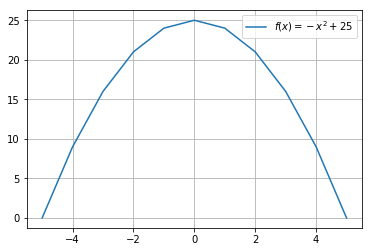

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Deinerer funksjonen
def f(x):
    return -x**2 + 25

# Gjør klar listene for x- og y-verdier
x_verdier = [] 
y_verdier = []

# Fyller listene med verdier
for x in range(-5,6):
    x_verdier.append(x)
    y_verdier.append(f(x))

print("x-verdier: ", x_verdier)
print("y-verdier: ", y_verdier)


plt.plot(x_verdier, y_verdier, label='$f(x)=-x^2+25$')
plt.legend()
plt.grid()
plt.show()    

Vi skal nå lage rektangler på samme måte som i figuerene over. Dette gjøres med koden under.

In [5]:
# Beregner arealet under grafen numerisk.
A = 0 # Initierer variabelen som skal inneholde totalarealet.
dx = 0.5 # bredden på hvert rektangel

for x in np.arange(-5,6,dx): # -5 og 6 er definisjonsområdet
    A += f(x) * dx # Legger til arealet av et nytt rektangel til totalarealet

print("Arealet under grafen er {}".format(A))

Arealet under grafen er 163.625


## Oppgaver

1. En husstands strømforbruk i antall kW gjennom et døgn ervgitt ved funksjonen $f(t)=-0.003t^3+0.1t^2-0.7t+2$ for $t\in[0,24]$ timer. Hva er husstandens totale strømforbruk i kWh dette døgnet? (Kilde: [nkhansen](https://www.nkhansen.com/category/matematikk/funksjoner/integrasjon/))

2. Funksjonen $T(t)=3.2\sin(0.3t-4.5)+10.5$ når $t\in[0,24]$ er en modell for hvordan temperaturen endrer seg i løpet av et døgn et sted i Norge. Temperaturen $T$ er målt i °C, og $t$ er antall timer etter midnatt. Plot funksjonen $T(t)$, og bruk integrasjon til å finne gjennomsnittstemperaturen denne dagen. (Kilde: NDLA - R2 - [Oppgave 3.8.10](https://ndla.no/sites/default/files/r2_funksjoner_oppgaver_nb_02.12.2016.pdf) )

3. Farten til en bil er gitt ved funksjonen $v(t)=-4\cdot\left(\frac{t}{1000}\right)^3 + \frac{t}{50}$ for $t\in[0,2250]$. Finn tilbakelagt strekning i det samme intervallet. Beskriv bevegelsen til bilden.